In [2]:
## import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy

In [3]:
## import table from HFHI
mortgagerelief = pd.read_csv('MRData.csv')
mortgagerelief.head(1)

,Affiliate,ID,Loan No,Street Address\n(ex: 1234 Five Lane),City,State Abbreviation,Zip,Sales Price,Closing Date\n(mm/yyyy),Term (Months),...,12-month report\nFinancial counseling provided during period of mortgage relief,12-month report\nOther training/support received from HFH?,12-month report\nDescription of other training received,12-month report\nReferrals to other agencies,12-month report\nDescribe referral,12-month report Resident Loan number-referenced) currently residing in home?,"12-month report If resident no longer residing in home, please explain",12-month report-additional details on titleholders residing in home,Note,Funds
0,Aitkin County HFH (MN),1,78001567,NaN,Aitkin,MN,56431,"$ 88,800.00",9/27/2013,240.0,...,Yes,No,local banker/mentor,No,NaN,Yes,NaN,NaN,NaN,Thrivent


In [4]:
mortgagerelief.columns

Index(['Affiliate', 'ID', 'Loan No', 'Street Address\n(ex: 1234 Five Lane)',
       'City', 'State Abbreviation', 'Zip', ' Sales Price ',
       'Closing Date\n(mm/yyyy)', 'Term (Months)', ' Opening Balance ',
       ' Principal and Interest Payment ',
       ' Total Monthly Payment (including escrow) ', 'Maturity Date\n(yyyy)',
       ' Outstanding Balance ',
       ' $ Amount supported by this award for this loan (for example, $600 if supporting 3 months of escrow payments at $200) ',
       'Days Delinquent (reported by the 5th of the month for the previous month)',
       'Reasons delinquent', 'Describe other reasons delinquent',
       'Forbearance issued?', '# of months forbearance issued', ' Arrearage ',
       'Please describe how this loan is serviced',
       'Has this property been foreclosed?',
       'Please explain why this property has been foreclosed',
       'FICO (when available)',
       'Date FICO accessed (when available-ex. Jun 20 for June 2020)',
       'Financia

### State Demographics

Text(0, 0.5, 'Count')

<Figure size 1600x1600 with 0 Axes>

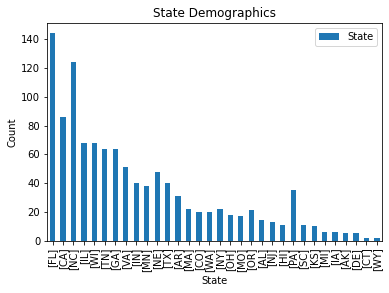

In [5]:
from matplotlib.pyplot import figure

states = mortgagerelief
states['State'] = states['Affiliate'].str.findall('\(([^\)]+)\)')
stateFreq = states['State'].value_counts().reset_index()
stateFreq = stateFreq.drop(1)

stateFreq.loc[0,'State'] += 12
stateFreq.loc[3, 'State'] += 40
stateFreq.loc[7,'State'] += 10
stateFreq.loc[5, 'State'] += 8
stateFreq.loc[24, 'State'] += 24
stateFreq.loc[30, 'State'] += 3
stateFreq.loc[11, 'State'] += 11
stateFreq.loc[12, 'State'] += 5
stateFreq.loc[17, 'State'] += 3
stateFreq.loc[6, 'State'] += 7
stateFreq.loc[20, 'State'] += 4

stateFreq = stateFreq.set_index('index')
stateFreq.sort_values(by='State', ascending=False)

figure(figsize=(20, 20), dpi=80)
stateFreq.plot.bar()
plt.title("State Demographics")
plt.xlabel("State")
plt.ylabel("Count")

Text(0.5, 1.0, 'State Demographics')

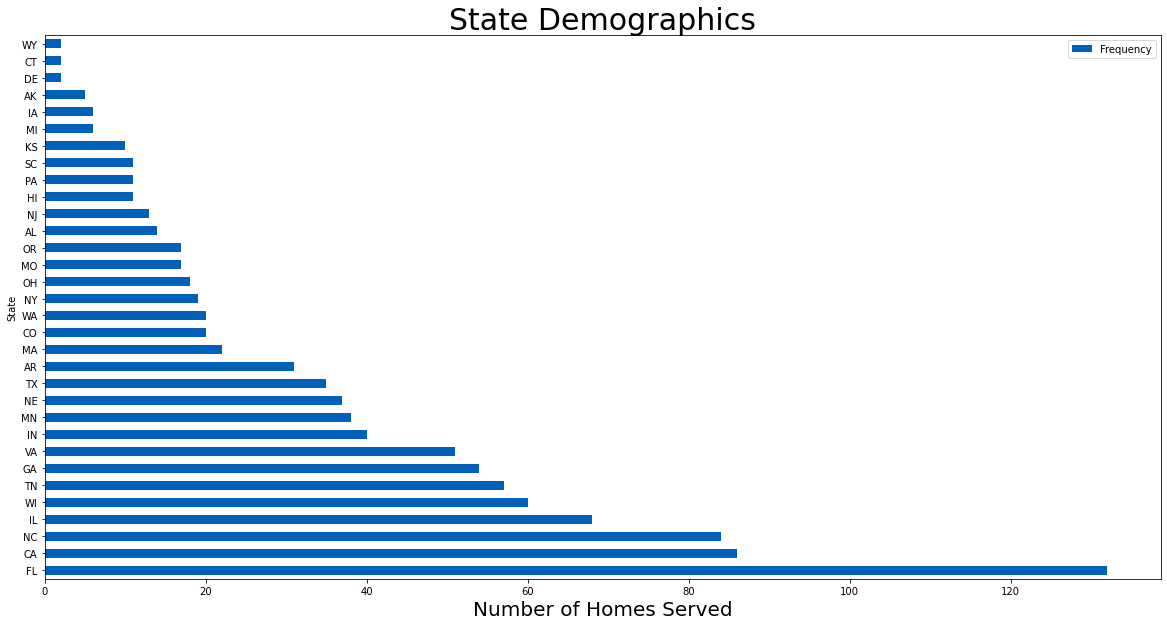

In [43]:
states = mortgagerelief
states['State'] = states['Affiliate'].str.findall('\(([^\)]+)\)')
stateFreq = states['State'].value_counts().reset_index()
stateFreq = stateFreq.drop(1).rename(columns={'State':'Frequency'})
stateFreq['State'] = stateFreq['index'].astype(str).str[2:4]
stateFreq = stateFreq[['State','Frequency']].set_index('State')
stateFreq.plot.barh(figsize=(20, 10),color=['#0060BA'])
plt.xlabel('Number of Homes Served',fontsize=20)
plt.title('State Demographics',fontsize=30)

In [29]:
!pip install chart_studio
from chart_studio import plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['state'] + '<br>' +\
    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
    'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = df['total exports'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Millions USD"
        )
    ) ]

layout = dict(
        title = '2011 US Agriculture Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )
    
fig = dict( data=data, layout=layout )

url = py.plot( fig, filename='d3-cloropleth-map' )

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=c62a5b7ade31d63c30fe621288dabd26c69c15e1611c70ddd40794d08e58934b
  Stored in directory: c:\users\leahm\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


KeyboardInterrupt: 

### Did the amount of support provided change over time?

In [24]:
counseling1 = mortgagerelief['Financial counseling provided during period of mortgage relief']
counseling1 = counseling1.str.lower()
counseling1 = counseling1.str.strip()
counseling1 = counseling1.replace({'none':'no'})
counseling1 = counseling1.value_counts()
counseling1 = counseling1/counseling1.sum()*100
counseling1

no     62.419562
yes    37.580438
Name: Financial counseling provided during period of mortgage relief, dtype: float64

In [25]:
#mortgagerelief.columns
counseling2 = mortgagerelief['6-month report\nFinancial counseling provided during period of mortgage relief']
counseling2 = counseling2.str.lower()
counseling2 = counseling2.str.strip()
counseling2 = counseling2.replace({'none':'no','no was offered':'no'})
counseling2 = counseling2.value_counts()
counseling2 = counseling2/counseling2.sum()*100
counseling2

no     75.885559
yes    24.114441
Name: 6-month report\nFinancial counseling provided during period of mortgage relief, dtype: float64

In [27]:
#mortgagerelief.columns
counseling3 = mortgagerelief['12-month report\nFinancial counseling provided during period of mortgage relief']
counseling3 = counseling3.str.lower()
counseling3 = counseling3.str.strip()
counseling3 = counseling3.replace({'resource direction and ihda ema referral':'yes','couldn’t meet with counseler':'no'})
counseling3 = counseling3.value_counts()
counseling3 = counseling3/counseling3.sum()*100
counseling3

no     71.493213
yes    28.506787
Name: 12-month report\nFinancial counseling provided during period of mortgage relief, dtype: float64

In [14]:
final = pd.concat([counseling1.value_counts(), counseling2.value_counts(), counseling3.value_counts()], axis=1)
final = final.dropna()
final
newdf = {'% of households receiving financial counseling':   [ counseling1.value_counts()['yes']/counseling1.value_counts()['no']], 
           '6 month: % of households receiving financial counseling': [counseling2.value_counts()['yes']/counseling2.value_counts()['no']] ,
           '12 month: % of households receiving financial counseling': [counseling3.value_counts()['yes']/counseling3.value_counts()['no'] ] 
           }

newdf=pd.DataFrame.from_dict(newdf)

<ipython-input-29-240081678e27>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  newseries = pd.Series()


<AxesSubplot:title={'center':'% of Households Receiving Financial Counseling Over Time'}, xlabel='Timeline', ylabel='Percentage'>

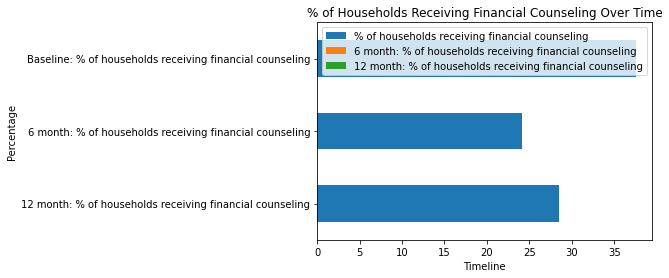

In [29]:
newdf.plot.barh()
plt.title("% of Households Receiving Financial Counseling Over Time")
plt.xlabel("Timeline")
plt.ylabel("Percentage")

newseries = pd.Series()
newseries['12 month: % of households receiving financial counseling'] = counseling3['yes']
newseries['6 month: % of households receiving financial counseling'] = counseling2['yes']
newseries['Baseline: % of households receiving financial counseling'] = counseling1['yes']
newseries.plot.barh()

<ipython-input-46-55d094c0905d>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  newseries = pd.Series()


12 month    28.506787
6 month     24.114441
Baseline    37.580438
dtype: float64

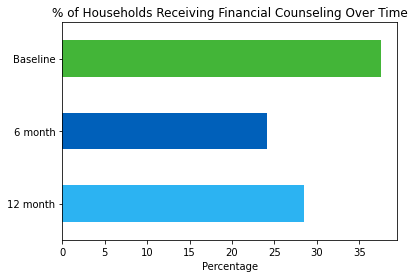

In [46]:
newseries = pd.Series()
newseries['12 month'] = counseling3['yes']
newseries['6 month'] = counseling2['yes']
newseries['Baseline'] = counseling1['yes']
newseries.plot.barh(color=['#2CB3F2', '#0060BA', '#43B538', '#EB34C0', '#A3007E', '#FF6E0D'])
plt.title("% of Households Receiving Financial Counseling Over Time")
plt.xlabel("Percentage");
newseries

### Any differences observed in the supportive services provided by specific affiliated organizations?

In [47]:
from matplotlib.pyplot import figure
othertraining = mortgagerelief['Description of other training received']
othertraining = othertraining.str.capitalize()
othertraining.value_counts()
# figure(figsize=(8, 6), dpi=80)
# othertraining.plot.barh()
# plt.title("Most Common Other Services Provided by HFH Affiliates")
# plt.ylabel("Service Description")
# plt.xlabel("Count")
'Supportive services offered by affiliated organizations include education programs, resources for energy assistance, information covid/emergency relief funds, wellness checks, informal counselling, and mentorship. These vary by affiliate.'

No late fees                                                                                                                            42
How to apply for in hardest hit funds                                                                                                   32
List provided of local covid hardship resources                                                                                         24
Education program is always available                                                                                                   19
Offered resources for energy assistance, emergency relief funds, local food pantries, etc.                                              16
Resources                                                                                                                               13
Classes                                                                                                                                 12
Offer of forbearance       

### Any differences observed in the supportive services provided and the ability for the homeowner to remain in their home over time?


In [54]:
from matplotlib.pyplot import figure
stayinhome = mortgagerelief.loc[:, ['Description of other training received', '12-month report Resident Loan number-referenced) currently residing in home?']]
stayinhome['12-month report Resident Loan number-referenced) currently residing in home?'] = stayinhome['12-month report Resident Loan number-referenced) currently residing in home?'].str.capitalize()
stayinhome['12-month report Resident Loan number-referenced) currently residing in home?'].value_counts()
# newcol = []
# for item in stayinhome['12-month report Resident Loan number-referenced) currently residing in home?']:
#     if (item == 'Yes'):
#         newcol.append(1) 
#     else:
#         newcol.append(0)
# stayinhome['Residing'] = newcol
# stayinhome[stayinhome['Residing']==0].dropna()
# stayinhome = stayinhome.groupby(by='Description of other training received').mean()
# figure(figsize=(80, 60), dpi=80)
# stayinhome.plot.bar()
# plt.title("% of Homeowners Residing in Home after 12 Months vs. Type of Support Received")
# plt.xlabel("Service Received", labelpad=100)
# plt.ylabel("% of Homeowners Residing in Home")

Yes      917
No        17
 yes       4
Name: 12-month report Resident Loan number-referenced) currently residing in home?, dtype: int64

### Any differences observed in the supportive services provided and the prevention of foreclosures?

In [58]:
from matplotlib.pyplot import figure
forclosed = mortgagerelief.loc[:, ['Description of other training received', 'Has this property been foreclosed?']]
forclosed[forclosed['Has this property been foreclosed?']=='Yes']
# fcol = []
# for item in forclosed['Has this property been foreclosed?']:
#     if (item == 'Yes'):
#         fcol.append(1) 
#     else:
#         fcol.append(0)
# forclosed['Foreclosed'] = fcol
# forclosed = forclosed.groupby(by='Description of other training received').sum()
# figure(figsize=(80, 60), dpi=80)
# forclosed.plot.bar()
# plt.title("Number of Properties Forclosed vs. Type of Support Received")
# plt.xlabel("Service Received", labelpad=100)
# plt.ylabel("Number of Homes Forclosed")

,Description of other training received,Has this property been foreclosed?
270,No late fees,Yes
777,NaN,Yes
1034,No late fees,Yes
1081,NaN,Yes


### What type of referrals were observed (columns AB-AF, BH-BN, CB-CF)

In [68]:
referral = mortgagerelief['Describe referral']
referral6 = mortgagerelief['6-month report\nDescribe referral']
referral12 = mortgagerelief['12-month report\nDescribe referral']

allreferral = referral.append(referral6)
allreferral = allreferral.append(referral12)
allreferral = allreferral.dropna().replace({'IDHA':'State Housing Development Authority','Local County  & State Mortgage Relief Resources':'Other Mortgage relief programs'})
allreferral = allreferral.replace({'Other Mortgage relief org':'Other Mortgage relief programs','Other agencies providing mortgage relief':'Other Mortgage relief programs'})
allreferral = allreferral.replace({'Tampa Bay 211, unemployment and Pinellas Opportunity Council':'211'})
allreferral = allreferral.value_counts().drop('as needed')
# allreferral = allreferral.value_counts().head(10)
# allreferral.plot.barh()
# plt.title("10 Most Frequent Types of Referrals Observed")
# plt.ylabel("Referral to Other Agency")
# plt.xlabel("Count")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(allreferral)
## additional mortgage relief programs, 211, food banks, credit counseling, state housing development authority, unemployment/job search

Other Mortgage relief programs                                                                                                                                                          107
IHDA                                                                                                                                                                                     38
Utilities                                                                                                                                                                                35
Tampa Bay 211, unemployment and Pinellas Opportunity Council                                                                                                                             27
credit counseling                                                                                                                                                                        26
additional financial assistance                             